In [1]:
import sys
sys.path.append('../')

from backdoor.dataset import cifar10

In [2]:
cifar = cifar10.CIFAR10().get_data()

In [3]:
import matplotlib.pyplot as plt
from backdoor.image_utils import ImageFormat

def plot(img):
    if img.ndim > 2:
        img = ImageFormat.scikit(img)
    plt.imshow(img)
    plt.show()

In [42]:
plot()

TypeError: plot() missing 1 required positional argument: 'img'

In [62]:
example = ImageFormat.torch(cifar['train'][0][0])

def add_backdoor(example):
    # Adds in torch mode
    e = example.copy()
    white = [1, 1, 1]
    black = white #[-1, -1, -1]
    e[:, 1, 1] = white
    e[:, 1, 3] = white
    e[:, 2, 2] = white
    e[:, 3, 1] = white
    e[:, 3, 3] = white
    e[:, 1, 2] = black
    e[:, 2, 1] = black
    e[:, 2, 3] = black
    e[:, 3, 2] = black
    return e

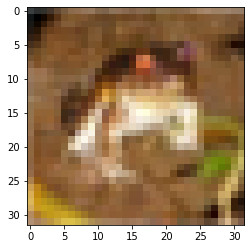

In [63]:
plot(example)

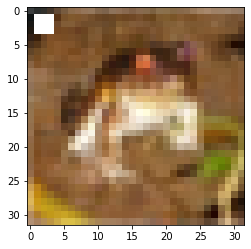

In [64]:
plot(add_backdoor(example))

In [65]:
backdoored = add_backdoor(example)

In [66]:
import numpy as np
def white_activation(x):
    return (np.e**x - 1)**10

def black_activation(x):
    return white_activation(-x)

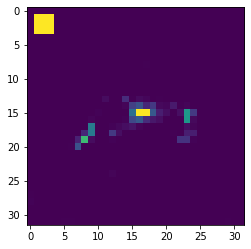

In [67]:
plot(white_activation(backdoored)[0, :, :])

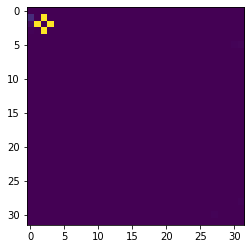

In [61]:
plot(black_activation(backdoored)[0, :, :])

In [40]:
white_activation(backdoored)

(3, 32, 32)

In [91]:
def minpool_3x3(example):
#     print(example.shape)
    # Max-pool 3x3 per channel
    output = np.zeros((example.shape[0], example.shape[1]-2, example.shape[2]-2), dtype=np.float32)
    for c in range(example.shape[0]):
        for x in range(output.shape[1]):
            for y in range(output.shape[2]):
                output[c, x, y] = np.min(example[c, x:x+3, y:y+3])
    return output

(3, 32, 32)


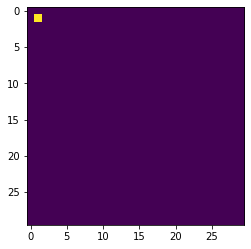

In [79]:
plot(minpool_3x3(white_activation(backdoored))[2, :, :])

In [74]:
example[0, 0:2, 0:2]

array([[-0.5372549, -0.6627451],
       [-0.8745098, -1.       ]], dtype=float32)

In [80]:
def global_maxpool(example):
    return example.max()

In [82]:
global_maxpool(minpool_3x3(white_activation(backdoored)))

(3, 32, 32)


224.35915

In [83]:
global_maxpool(minpool_3x3(white_activation(example)))

(3, 32, 32)


24.86229

In [92]:
from tqdm import tqdm

clean_hist = []
backdoor_hist = []
for example in tqdm(ImageFormat.torch(cifar['train'][0])):
#     example = example[0]
#     print(example.shape)
    backdoored = add_backdoor(example)
    
    clean_hist.append(global_maxpool(minpool_3x3(white_activation(example))))
    backdoor_hist.append(global_maxpool(minpool_3x3(white_activation(backdoored))))

  3%|████▉                                                                                                                                                      | 1581/50000 [00:35<18:01, 44.79it/s]


KeyboardInterrupt: 

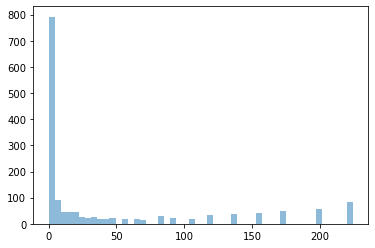

In [97]:
import matplotlib.pyplot as plt

plt.hist(clean_hist, label='clean', alpha=0.5, bins=50)
plt.hist(backdoor_hist, label='backdoor', alpha=0.5, bins=50)
plt.show()

In [101]:
(np.array(clean_hist) < 20).mean()

0.6331435800126503

In [102]:
np.mean(clean_hist)

45.464764

In [103]:
backdoor_hist

[224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224